In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1)
y_data.shape # (506, 1)

(506, 1)

In [4]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data[:3] 

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)
# X 데이터의 학습 데이터셋, X 데이터의 테스트 데이터셋
# Y 데이터의 학습 데이터셋, Y 데이터의 테스트 데이터셋

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339, 1), (167, 1))

In [6]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True,normalize=False,copy_X=True, n_jobs=8)
lasso_regr = linear_model.Lasso(
         alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01, 
                                      max_iter=1000, tol=0.001, eta0=0.01)

In [7]:
regr.fit(X_train, y_train) 

LinearRegression(n_jobs=8)

In [8]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.86129759  0.27632862  0.10322333  0.33532791 -1.89104482  3.55479622
  -0.04952964 -3.01015804  1.22330686 -1.00916771 -1.98466467  0.62386235
  -3.9996908 ]]
intercept:  [29.42877381]


In [9]:
regr.predict(x_data[:5])

array([[-58.72562452],
       [-32.88598964],
       [-11.38914021],
       [ 10.01207448],
       [  1.87764423]])

In [10]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-58.72562452],
       [-32.88598964],
       [-11.38914021],
       [ 10.01207448],
       [  1.87764423]])

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7012192205071575, 3.6874625281998266, 28.869826251555843)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

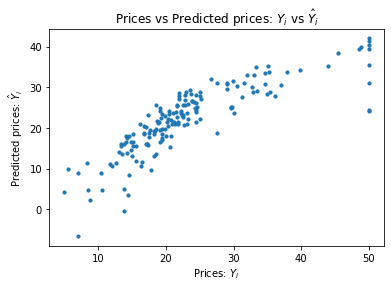

In [12]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")